# Laporan PSD

## Pendahuluan

### Latar Belakang

Investasi saham telah menjadi salah satu instrumen yang populer di kalangan masyarakat, baik di Indonesia maupun secara global. Saham PT Bank Central Asia Tbk (BBCA) merupakan salah satu saham yang paling diminati oleh para investor karena kestabilannya dan prospek pertumbuhannya yang positif dalam jangka panjang. Namun, fluktuasi harga saham yang tidak dapat diprediksi menjadi tantangan bagi para investor, terutama yang menggunakan strategi jangka pendek. Dengan semakin berkembangnya teknologi dan ketersediaan data, metode prediksi harga saham berbasis sains data semakin relevan untuk memberikan panduan yang lebih baik dalam pengambilan keputusan investasi.

Pada proyek ini, pendekatan berbasis machine learning akan digunakan untuk memprediksi harga saham BBCA dengan memanfaatkan data historis harga saham BBCA. Penggunaan teknologi ini diharapkan dapat membantu investor dalam mengambil keputusan yang lebih tepat dan mengurangi risiko investasi.

### Rumusan Masalah

Masalah utama yang dihadapi oleh investor saham adalah ketidakpastian dalam memprediksi pergerakan harga saham di masa depan. Pada proyek ini, beberapa pertanyaan penelitian yang ingin dijawab antara lain:

- Apakah algoritma machine learning dapat secara akurat memprediksi harga saham BBCA berdasarkan data historis?
- Faktor-faktor atau indikator apa yang paling berpengaruh terhadap prediksi harga saham BBCA?
- Bagaimana tingkat akurasi model prediksi jika dibandingkan dengan metode konvensional atau strategi investasi lainnya?

### Tujuan

Proyek ini bertujuan untuk:

- Mengembangkan model prediksi harga saham BBCA menggunakan algoritma machine learning berdasarkan data historis dan indikator teknikal.
- Mengidentifikasi faktor-faktor atau variabel yang paling berpengaruh dalam menentukan harga saham BBCA.
- Menyediakan alat bantu yang dapat membantu investor dalam membuat keputusan investasi yang lebih baik dengan menggunakan hasil prediksi - dari model yang dibangun.
- Mengevaluasi kinerja model prediksi dalam hal akurasi dan keandalannya dibandingkan dengan metode konvensional.

## Data Understanding

### Pengumpulan Data

Dalam proyek ini, data historis saham dari Bank Central Asia (BBCA) dikumpulkan untuk dianalisis. Data diambil dari situs [Investing](https://www.investing.com/equities/bnk-central-as-historical-data), yang menyediakan informasi lengkap terkait pergerakan harga saham selama periode yang ditentukan. Proses pengumpulan data dilakukan dengan mengekspor data dalam bentuk file CSV. Data yang terkumpul mencakup rentang waktu mulai dari tahun 2015 hingga 2024, dengan total 2361 baris data yang mewakili tiap hari perdagangan selama periode tersebut.

### Deskripsi Data

Data saham yang diambil memilik 7 fitur atau kolom, yaitu :

- Tanggal : Tanggal perdagangan saham dengan format YYYY-MM-DD.
- Terakhir : Harga penutupan (Close) saham pada akhir hari perdagangan.
- Pembukaan : Harga saham saat pembukaan (Open) pasar pada awal hari perdagangan.
- Tertinggi : Harga tertinggi yang dicapai oleh saham selama hari perdagangan.
- Terendah : Harga terendah yang dicapai oleh saham selama hari perdagangan.
- Vol.: Volume saham yang diperdagangkan selama hari tersebut.
- Perubahan% : Persentase perubahan harga saham dibandingkan dengan hari perdagangan sebelumnya.

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use raw.githubusercontent.com to access raw data
df = pd.read_csv('https://raw.githubusercontent.com/Rieko00/psd/main/bbca_csv.csv')
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2024-09-27,10650,10500,10750,10400,93030000,-0.0047
1,2024-09-26,10700,10875,10875,10675,84960000,-0.0138
2,2024-09-25,10850,10675,10850,10525,158370000,0.0046
3,2024-09-24,10800,10775,10950,10775,105190000,-0.0137
4,2024-09-23,10950,10725,10950,10725,72550000,0.0162


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     2361 non-null   object 
 1   Terakhir    2361 non-null   int64  
 2   Pembukaan   2361 non-null   int64  
 3   Tertinggi   2361 non-null   int64  
 4   Terendah    2361 non-null   int64  
 5   Vol.        2361 non-null   int64  
 6   Perubahan%  2361 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 129.2+ KB


In [3]:
df.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,2361.000000,2361.000000,2361.000000,2361.000000,2.361000e+03,2361.000000
mean,13163.716645,13163.731470,13279.758577,13045.664972,5.258618e+07,0.000361
std,6956.742500,6954.951351,7008.344719,6896.720711,5.244959e+07,0.022031
min,4430.000000,4450.000000,4800.000000,4325.000000,3.810000e+06,-0.800300
25%,7500.000000,7500.000000,7575.000000,7425.000000,1.441000e+07,-0.006500
50%,10200.000000,10225.000000,10300.000000,10150.000000,3.862000e+07,0.000000
75%,16700.000000,16750.000000,16900.000000,16625.000000,7.550000e+07,0.007400
max,31450.000000,31350.000000,31450.000000,31025.000000,7.564300e+08,0.173300


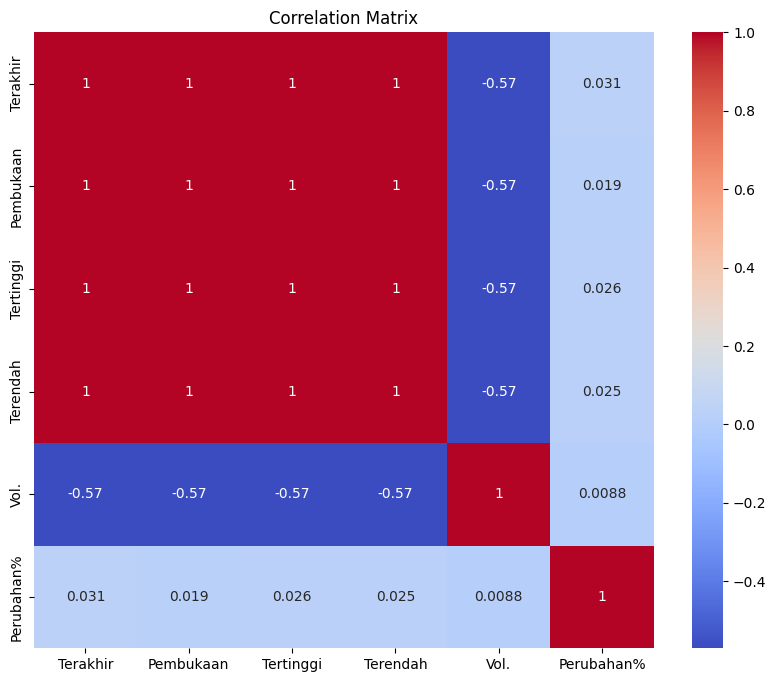

In [4]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corelation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

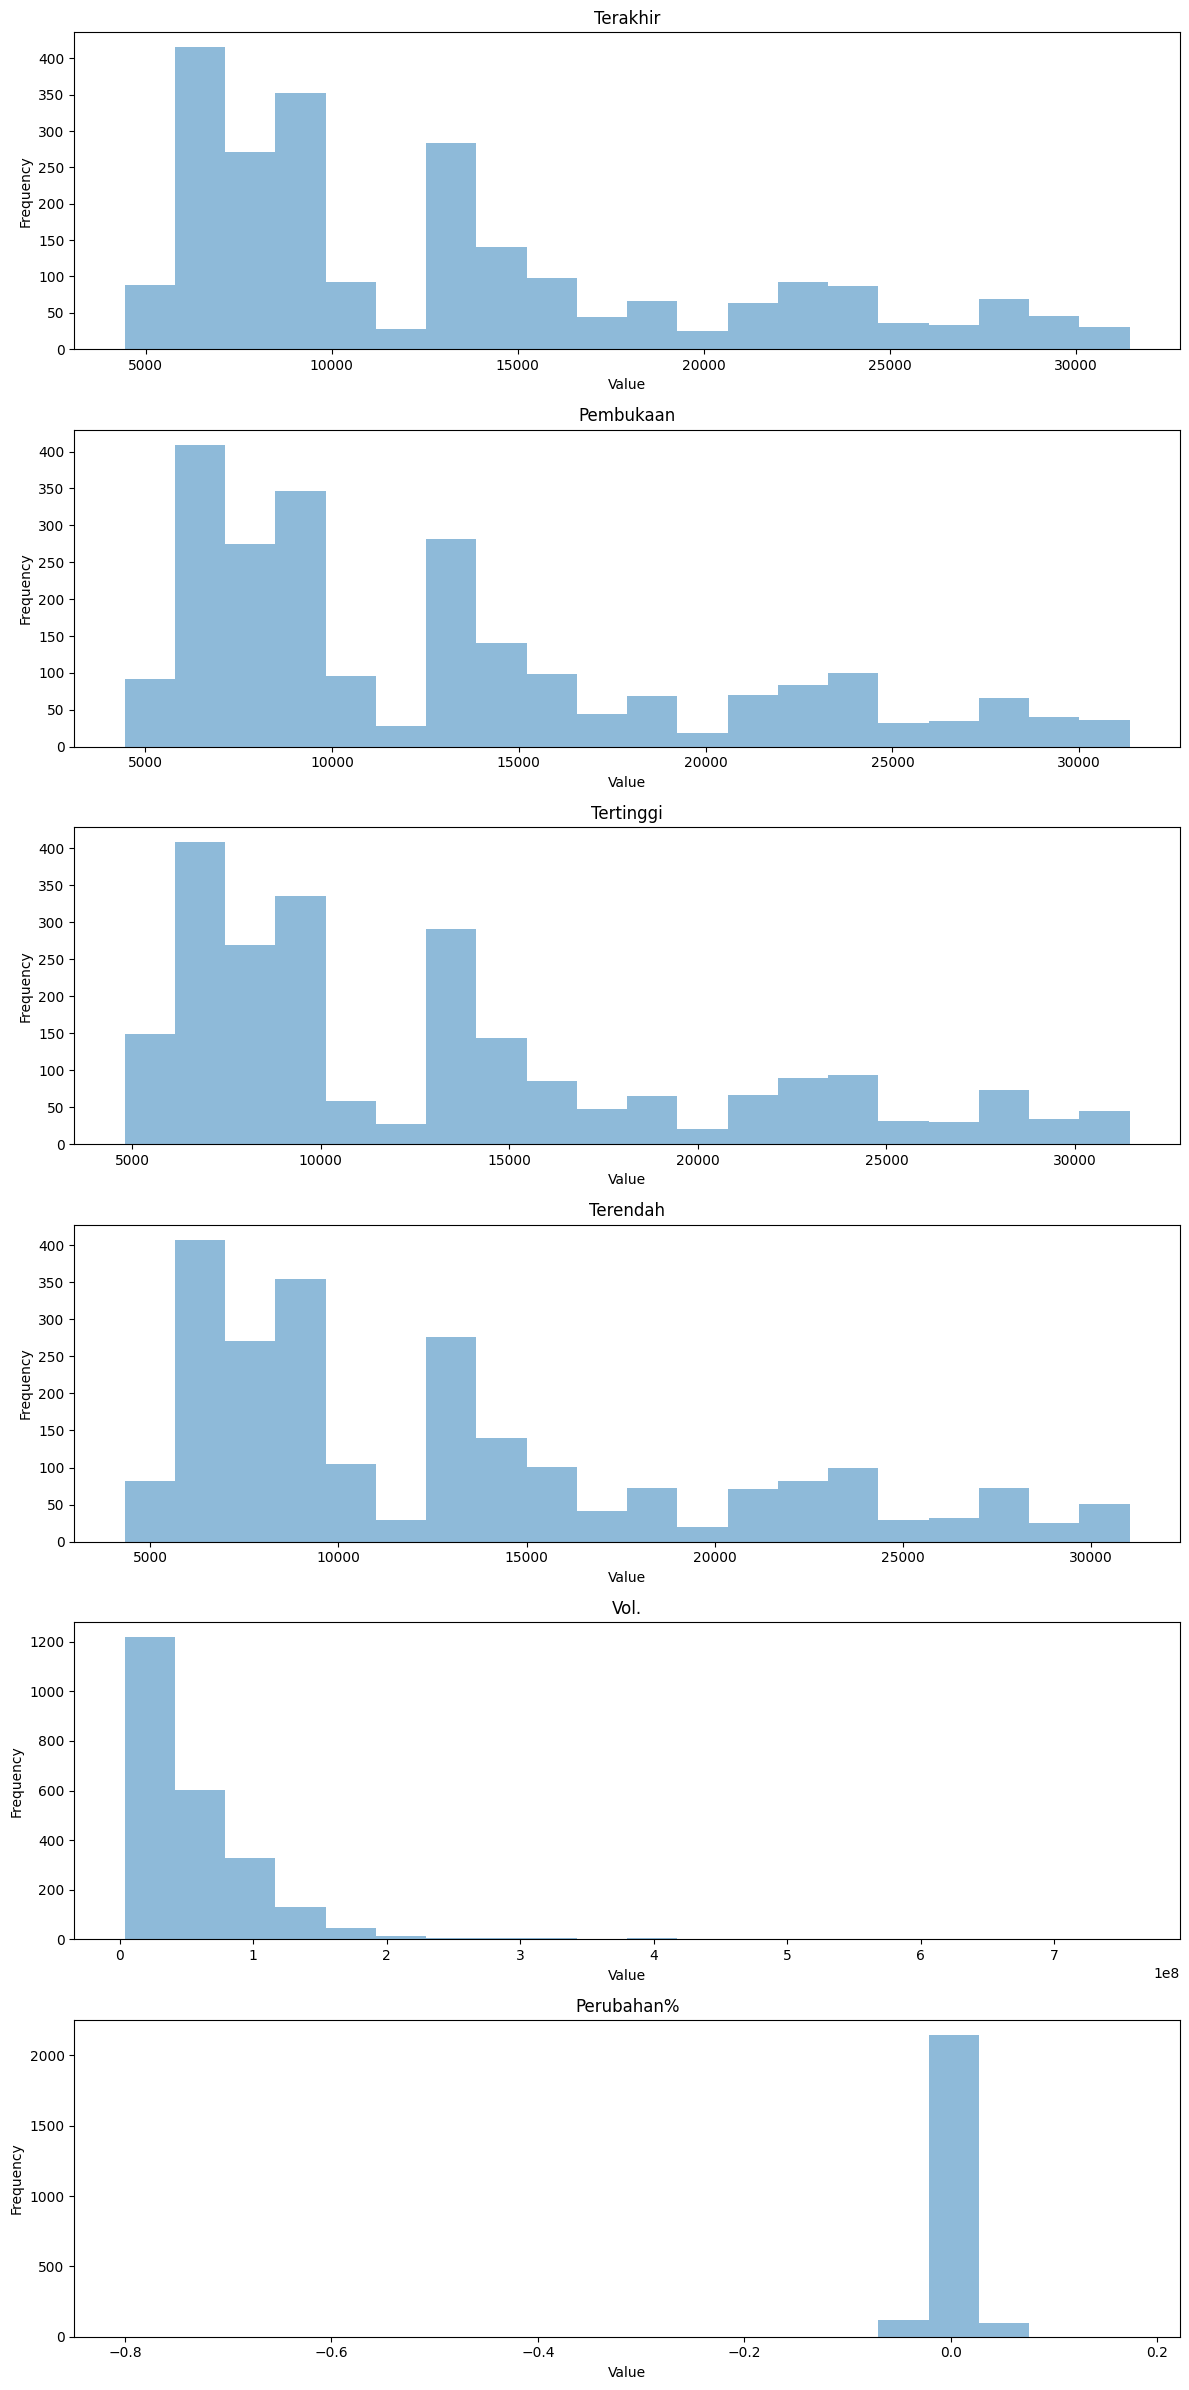

In [5]:
num_column = len(df_numeric.columns)
num_rows = num_column

plt.figure(figsize=(12, 4 * num_column))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(num_column, 1, i)
    plt.hist(df_numeric[column], bins = 20, alpha = 0.5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

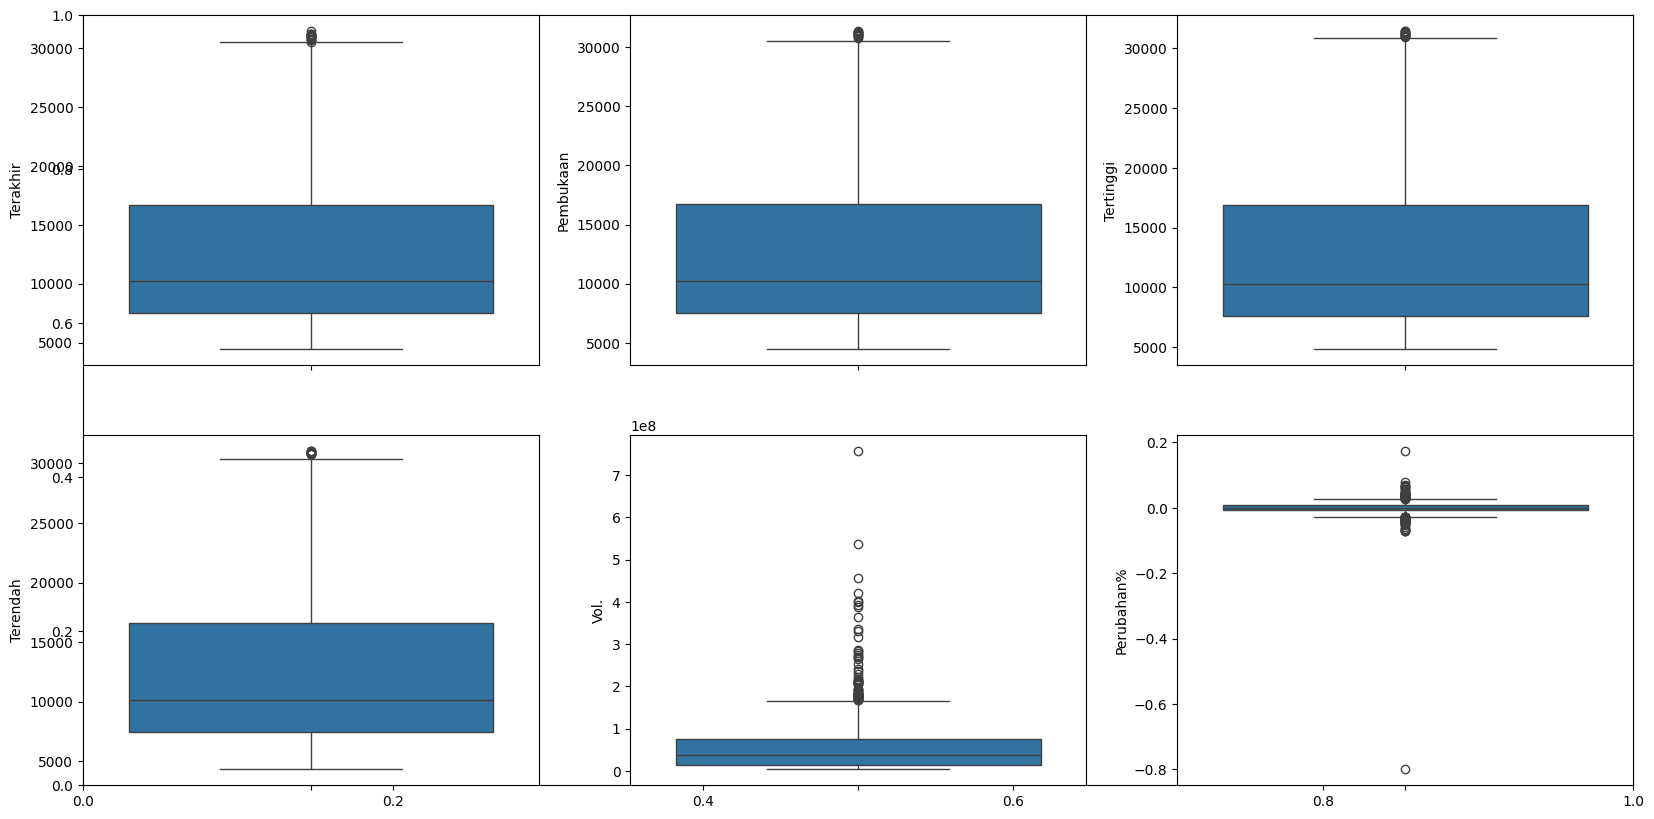

In [6]:
features = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

## Data Prepocessing

### Null Value

In [7]:
df.isnull().sum()


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64